In [76]:
import pandas as pd
import os
import numpy as np
from datetime import date
today = str(date.today())
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
#Set path variables and read in data set
user = os.path.expanduser('~')
home = os.path.join(user, 'Box/LS_Folders/CANDLab_LS/TraumaData')
data = os.path.join(home, 'RI_Downloads/UCLARIADULT52218_DATA_2019-07-18_0919.csv')    
dset = pd.read_csv(data, header = 0)

In [3]:
events = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y']
numoccs = range(1,32) #number of occurrences -- up to 31 for each event

In [4]:
#Empty lists to append threat/dep scores
sumthr=[]
sumdep=[]

#Define function to count number of endorsements of threat or deprivation
def score_num(e, x, thde): 
    data = dset.loc[[i]]
    try:
        if data['ucla_a_{}_e{}_{}'.format(e, x, thde)].item() == int('1'):
            if thde == 'thr':
                print('{} endorsed threat for {}e{}'.format(data.index.item(),e,x))
                sumthr.append([data['ucla_a_id'].item(),'1', data['ucla_a_{}_e{}_age'.format(e, x, thde)].item()])
            elif thde == 'dep':
                print('{} endorsed dep for {}e{}'.format(data.index.item(),e,x))
                sumdep.append([data['ucla_a_id'].item(), '1', data['ucla_a_{}_e{}_age'.format(e, x, thde)].item()])
    except:
        pass
    

In [5]:
for i in range(0,len(dset)):
    for e in events:
        for x in numoccs:
            score_num(e,x,'thr')
            score_num(e,x,'dep')


38 endorsed threat for ae2
38 endorsed threat for ae3
38 endorsed threat for be1
38 endorsed dep for be1
38 endorsed threat for be2
38 endorsed threat for de1
38 endorsed dep for de1
38 endorsed threat for de2
38 endorsed dep for de2
40 endorsed threat for ee1
41 endorsed threat for ee1
43 endorsed threat for be3
43 endorsed threat for ee1
43 endorsed threat for ee2
43 endorsed dep for ee2
44 endorsed threat for ce1
46 endorsed threat for ce1
46 endorsed threat for ee1
49 endorsed threat for ae1
50 endorsed threat for ce1
53 endorsed threat for be7
53 endorsed threat for be8
53 endorsed threat for ce1
54 endorsed threat for ae2
54 endorsed threat for be1
57 endorsed threat for ae1
57 endorsed threat for be1
57 endorsed threat for be5
57 endorsed threat for de1
57 endorsed dep for de1
58 endorsed threat for ee1
59 endorsed threat for ee1
61 endorsed threat for be6
61 endorsed threat for be7
61 endorsed threat for be9
61 endorsed threat for ce2
62 endorsed dep for be5
65 endorsed threat 

In [78]:
threat = pd.DataFrame(sumthr).rename(columns = {0:'ucla_a_id', 1:'thr_endorsed', 2:'age_thr_endorsed'})
depriv = pd.DataFrame(sumdep).rename(columns = {0:'ucla_a_id', 1:'dep_endorsed', 2:'age_dep_endorsed'})
thr_dep = pd.merge(threat, depriv, on='ucla_a_id', how='outer')

thr_grouped = threat.groupby('age_thr_endorsed').count().reset_index().rename(columns= {'age_thr_endorsed':'age_endorsed'})
dep_grouped = depriv.groupby('age_dep_endorsed').count().reset_index().rename(columns = {'age_dep_endorsed':'age_endorsed'})
merge_grouped = pd.merge(thr_grouped, dep_grouped, on='age_endorsed', how='outer').drop(['ucla_a_id_x','ucla_a_id_y'], axis=1)
merge_grouped.to_csv(home + "/Threat_dep_age_merged_"+today+".csv")

In [26]:
#Generate Plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import matplotlib.patches as mpatches

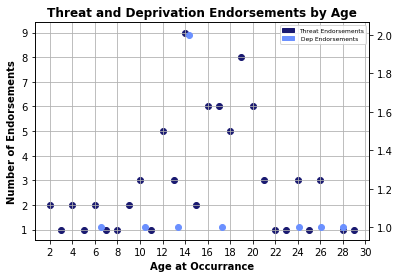

In [77]:
x = merge_grouped['age_endorsed']
y1 = merge_grouped['thr_endorsed']
y2 = merge_grouped['dep_endorsed']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#Axis 1 - threat scatter
ax1.scatter(x,y1, color='#191970')
#Axis 2 - (deprivation scatter)
ax2.scatter(x, y2,  color='#6B90FF')

#Add descriptive patches
patch1 = mpatches.Patch(color='#191970', label='Threat Endorsements')
patch2 = mpatches.Patch(color='#6B90FF', label=' Dep Endorsements')
plt.legend(handles=[patch1, patch2], prop={'size': 6})

#Add background grid
ax1.grid(True)
plt.xticks(np.arange(0, 31 ,step = 2.0), rotation = 'vertical')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Age at Occurrance', fontsize = 'medium', fontweight = 'bold')
ax1.set_ylabel('Number of Endorsements', fontsize = 'medium', fontweight = 'bold')
ax1.set_title('Threat and Deprivation Endorsements by Age', fontsize = 'large', fontweight = 'bold')

plt.show()
fig.savefig(home + "/Threat_dep_age"+today+".png")